# Introducción a OpenCV-Python

Imágenes en OpenCV
Cargar, salvar y mostrar imágenes
Acceder a los datos de los píxeles
Manipular los canales de color
Uso de matplotlib

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt


In [2]:
# Cargar una imagen en modo monocromático (un canal)
img = cv.imread('imgBloque1.bmp',cv.IMREAD_GRAYSCALE)

# Como lucen los datos en un np.array
print(img)

# Dimensión de la imagen
print('\nTamaño imagen: {} pix'.format(img.shape))


[[ 62  62  61 ... 255 222 176]
 [ 62  62  61 ... 255 222 176]
 [ 61  61  60 ... 255 219 173]
 ...
 [ 68  68  69 ... 100 101 102]
 [ 67  67  67 ... 103 103 102]
 [ 66  66  66 ... 108 105 103]]

Tamaño imagen: (480, 640) pix


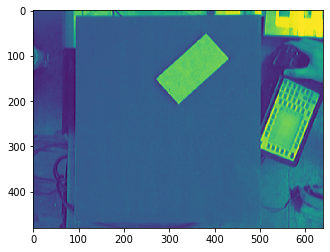

In [3]:
# Muestro la imagen con matplotlib
plt.imshow(img)
plt.show()

# Qué pasó con la visualización ???

In [12]:
# Veamos qué pasa cuando queremos usar highgui en Jupyter para ver la misma imagen
cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()

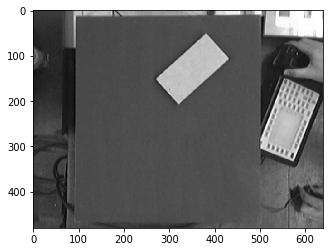

In [4]:
# Quiero ver la imagen en tonos de grises
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

#### Ejercicio
Explorar qué pasa al cambiar vmin y vmax. Buscar una explicación

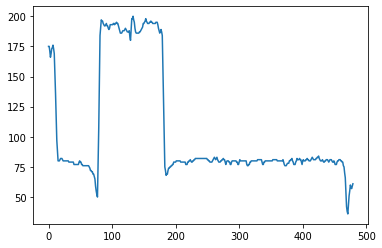

In [5]:
# Quiero ver un perfil. Es decir la intensidad a lo largo de la columna 350 por ejemplo

perfil = img[:,350];
plt.plot(perfil)
plt.show()

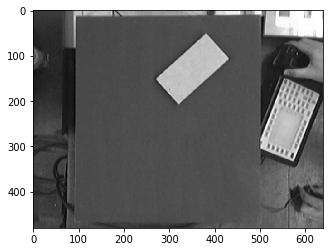

In [6]:
# Ahora hagamos una marca en la imagen para indicar la línea que usamos para tomar el perfil
img_anotada = img.copy()
img_anotada[:,350]=0
plt.imshow(img_anotada,cmap='gray')
plt.show()

# Veo acaso la línea negra

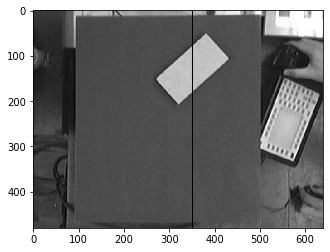

In [11]:
# Voy a marcar más líneas adyacentes
img_anotada[:,351]=0
img_anotada[:,352]=0
plt.imshow(img_anotada,cmap='gray')
plt.show()


Mostrando con interpolacion nearest


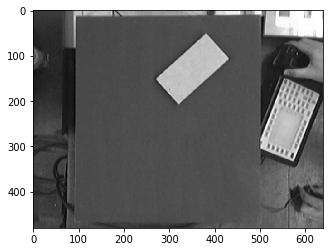

Mostrando con interpolacion bilinear


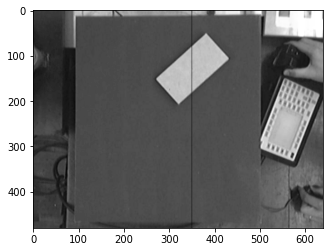

Mostrando con interpolacion bicubic


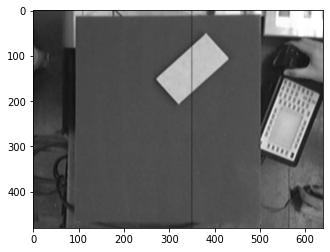

In [7]:
# Otra forma de interpolar que no me oculta líneas al mostrar
img_anotada = img.copy()
img_anotada[:,350]=0
for interp in ['nearest','bilinear','bicubic']:
    print('Mostrando con interpolacion {}'.format(interp))
    plt.imshow(img_anotada,cmap='gray',interpolation=interp)
    plt.show()

In [9]:
# Ahora quiero verla como imagen en color
img_color = cv.imread('imgBloque1.bmp')
print(img_color)

# Dimensión de la imagen
print('\nTamaño imagen: {} '.format(img_color.shape))


[[[ 67  61  62]
  [ 67  61  62]
  [ 66  60  61]
  ...
  [255 255 255]
  [224 223 218]
  [178 177 172]]

 [[ 67  61  62]
  [ 67  61  62]
  [ 66  60  61]
  ...
  [255 255 255]
  [224 223 218]
  [178 177 172]]

 [[ 66  60  61]
  [ 66  60  61]
  [ 65  59  60]
  ...
  [255 255 255]
  [221 220 215]
  [175 174 169]]

 ...

 [[ 71  68  68]
  [ 71  68  68]
  [ 72  69  69]
  ...
  [120 101  90]
  [121 102  91]
  [122 103  92]]

 [[ 70  67  67]
  [ 70  67  67]
  [ 70  67  67]
  ...
  [134 103  92]
  [134 102  93]
  [133 101  92]]

 [[ 69  66  66]
  [ 69  66  66]
  [ 69  66  66]
  ...
  [139 108  97]
  [136 104  95]
  [134 102  93]]]

Tamaño imagen: (480, 640, 3) 


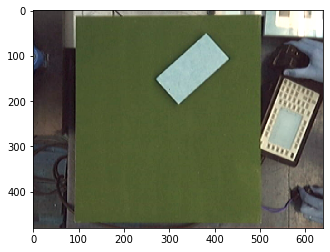

In [11]:
# Muestro la imagen color
plt.imshow(img_color)
plt.show()

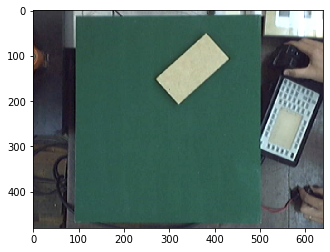

In [15]:
# Parece que tengo problemas con la paleta de colores 
# Paso la imagen de BRG a RGB
imgRGB = cv.cvtColor(img_color,cv.COLOR_BGR2RGB)

plt.imshow(imgRGB)
plt.show()

#### Ejercicio: Hallar una forma sencilla de invertir el orden de los canales usando Numpy

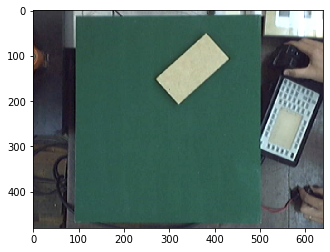

In [13]:
# Respuesta
imgRGB = img_color[:,:,::-1]
plt.imshow(imgRGB)
plt.show()

# Otra 
imgRGB = img_color[...,::-1]


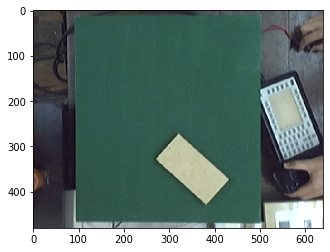

In [14]:
imgRGB = img_color[::-1,:,::-1]
plt.imshow(imgRGB)
plt.show()


[[ 66  66  66 ...  97  95  93]
 [ 67  67  67 ...  92  93  92]
 [ 68  68  69 ...  90  91  92]
 ...
 [ 61  61  60 ... 255 215 169]
 [ 62  62  61 ... 255 218 172]
 [ 62  62  61 ... 255 218 172]]
Canal rojo


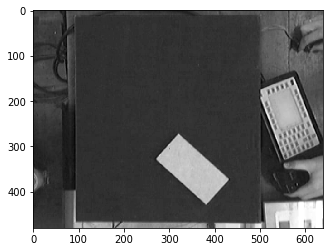

Canal verde


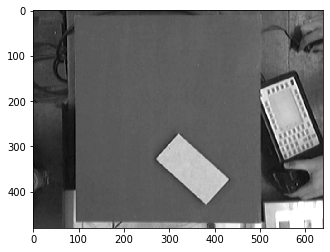

Canal azul


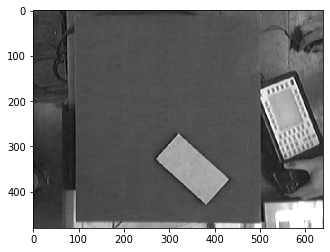

In [15]:
# Quiero desensamblar los canales para trabajarlos por separado

im_r,im_g,im_b = cv.split(imgRGB)
print(im_r)
print('Canal rojo')
plt.imshow(im_r, cmap='gray')
plt.show()
print('Canal verde')
plt.imshow(im_g, cmap='gray')
plt.show()
print('Canal azul')
plt.imshow(im_b, cmap='gray')
plt.show()


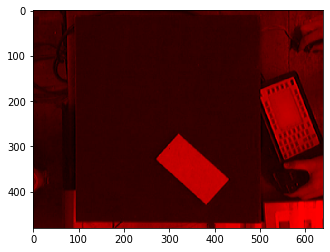

In [16]:
# Vamos a eliminar un plano y reconstruimos la imagen

imgRGB2 = cv.merge((im_r,im_g*0,im_b*0))

plt.imshow(imgRGB2)
plt.show()

#  Qué combinación de canales me da la mayor discriminación ??

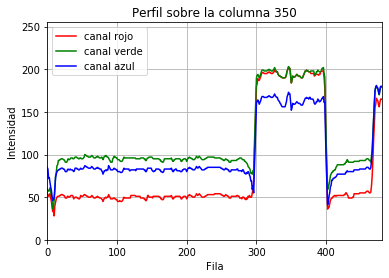

In [17]:
idx_col = 350
perfil_color = imgRGB[:,idx_col]
plt.plot(perfil_color[:,0],color='r',label='canal rojo')
plt.plot(perfil_color[:,1],color='g',label='canal verde')
plt.plot(perfil_color[:,2],color='b',label='canal azul')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title('Perfil sobre la columna {}'.format(idx_col))
plt.grid()
plt.xlim(0,480)
plt.ylim(0,255)
plt.legend()
plt.show()

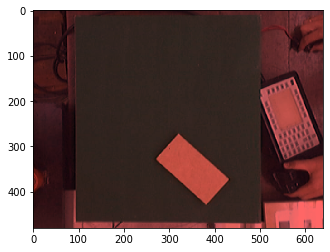

In [41]:
# Vamos a componer la imagen color con distintos pesos en los canales
# Notar el uso de uint8 !!
imgRGB2 = cv.merge((im_r,np.uint8(im_g*0.4),np.uint8(im_b*0.4)))

plt.imshow(imgRGB2)
plt.show()


In [43]:
# Salvemos la imagen modificada
cv.imwrite('modificada.png',imgRGB2)

# Verificar cómo quedaron los colores y tratar de explicar qué pasó


True